#importing all the aplicable libraries

# Bharat Ramchire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
House_Price=pd.read_csv("C:/Users/HP/Desktop/PYTHON/multiple linear regression/House-Price.csv")

##Exploratorty data analysis

In [3]:
House_Price.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [4]:
House_Price.tail()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006,1
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572,1
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694,1
505,19.0,41.93,0.573,6.030,80.8,2.72,2.24,2.64,2.42,19.0,7.88,YES,10.280,10.1520,None,45,YES,0.060336,1


In [5]:
House_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   dist1        506 non-null    float64
 6   dist2        506 non-null    float64
 7   dist3        506 non-null    float64
 8   dist4        506 non-null    float64
 9   teachers     506 non-null    float64
 10  poor_prop    506 non-null    float64
 11  airport      506 non-null    object 
 12  n_hos_beds   498 non-null    float64
 13  n_hot_rooms  506 non-null    float64
 14  waterbody    506 non-null    object 
 15  rainfall     506 non-null    int64  
 16  bus_ter      506 non-null    object 
 17  parks        506 non-null    float64
 18  Sold         506 non-null    int64  
dtypes: float

In [6]:
House_Price.isna().sum()

price          0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
Sold           0
dtype: int64

In [7]:
House_Price['airport'].value_counts()

YES    279
NO     227
Name: airport, dtype: int64

In [8]:
House_Price['waterbody'].value_counts()

River             183
None              155
Lake               97
Lake and River     71
Name: waterbody, dtype: int64

In [9]:
House_Price['bus_ter'].value_counts()

YES    506
Name: bus_ter, dtype: int64

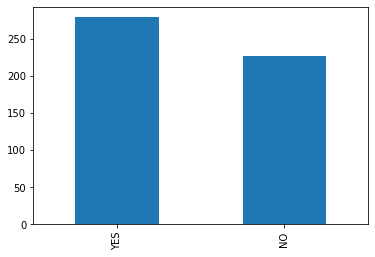

In [10]:
House_Price['airport'].value_counts().plot(kind='bar')

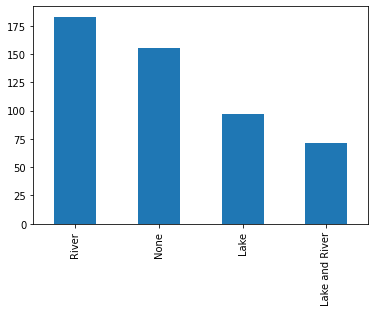

In [11]:
House_Price['waterbody'].value_counts().plot(kind='bar')

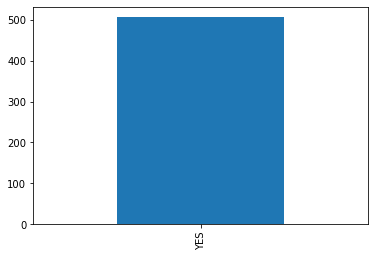

In [12]:
House_Price['bus_ter'].value_counts().plot(kind='bar')

In [13]:
House_Price.drop(['bus_ter'], axis=1, inplace=True)

In [14]:
House_Price.shape

(506, 18)

In [15]:
##for distances we take a average

In [16]:
House_Price["avg_dist"]=House_Price[["dist1","dist2","dist3","dist4"]].mean(axis=1)

In [17]:
House_Price.drop(["dist1","dist2","dist3","dist4"], axis=1, inplace=True)

In [18]:
House_Price.shape

(506, 15)

In [19]:
House_Price.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.1920,River,23,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,101.1200,None,38,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474,0,6.0625


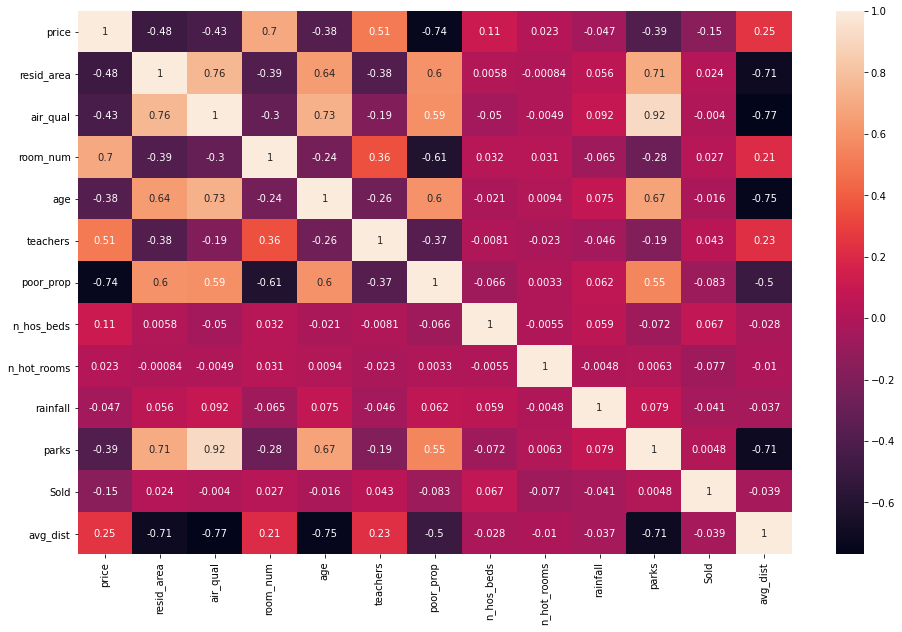

In [20]:
plt.figure(figsize = (16,10))
sns.heatmap(House_Price.corr(),annot = True)

In [21]:
# Converting Yes to 1 and No to 0
House_Price['airport'] =House_Price['airport'].map({'YES': 1, 'NO': 0})

In [22]:
#House_Price['Sold'] =House_Price['Sold'].map({1: 'YES', 0: 'NO'})

In [23]:
House_Price['Sold'].astype('str')

0      0
1      1
2      0
3      0
4      0
      ..
501    1
502    1
503    1
504    1
505    1
Name: Sold, Length: 506, dtype: object

In [24]:
House_Price.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.1920,River,23,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.1728,Lake,42,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,101.1200,None,38,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.2672,Lake,45,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.2896,Lake,55,0.039474,0,6.0625


In [25]:
House_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   resid_area   506 non-null    float64
 2   air_qual     506 non-null    float64
 3   room_num     506 non-null    float64
 4   age          506 non-null    float64
 5   teachers     506 non-null    float64
 6   poor_prop    506 non-null    float64
 7   airport      506 non-null    int64  
 8   n_hos_beds   498 non-null    float64
 9   n_hot_rooms  506 non-null    float64
 10  waterbody    506 non-null    object 
 11  rainfall     506 non-null    int64  
 12  parks        506 non-null    float64
 13  Sold         506 non-null    int64  
 14  avg_dist     506 non-null    float64
dtypes: float64(11), int64(3), object(1)
memory usage: 59.4+ KB


In [26]:
##visualaisation of the data

In [27]:
House_Price['price'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: price, dtype: float64

In [28]:
print(House_Price['price'].skew())

1.1109118502479587


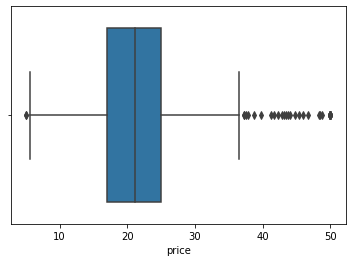

In [29]:
sns.boxplot(House_Price['price'])
plt.show()

In [30]:
##treat with outliers

In [31]:

print(House_Price['price'].quantile(0.95))

43.4


In [32]:
House_Price['price'] = np.where(House_Price['price'] > 43.4, 45, House_Price['price'])
House_Price['price'].describe()

count    506.000000
mean      22.351383
std        8.683617
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       45.000000
Name: price, dtype: float64

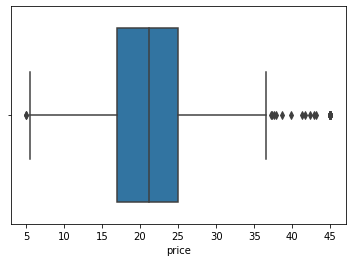

In [33]:
sns.boxplot(House_Price['price'])
plt.show()

In [34]:
print(House_Price['price'].skew())

0.8641551472973832


In [35]:
House_Price['resid_area'].describe()

count    506.000000
mean      41.136779
std        6.860353
min       30.460000
25%       35.190000
50%       39.690000
75%       48.100000
max       57.740000
Name: resid_area, dtype: float64

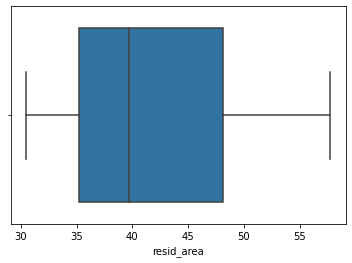

In [36]:
sns.boxplot(House_Price['resid_area'])

In [37]:
print(House_Price['resid_area'].skew())

0.2950215678735116


In [38]:
House_Price['air_qual'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: air_qual, dtype: float64

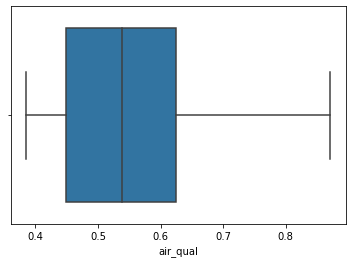

In [39]:
sns.boxplot(House_Price['air_qual'])

In [40]:
House_Price['room_num'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: room_num, dtype: float64

In [41]:
print(House_Price['room_num'].skew())

0.4036121332887437


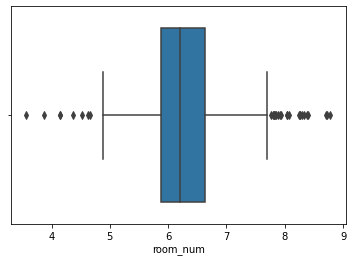

In [42]:
sns.boxplot(House_Price['room_num'])

In [43]:
print(House_Price['room_num'].quantile(0.05))
print(House_Price['room_num'].quantile(0.95))

5.314
7.5875


In [44]:
House_Price['room_num'] = np.where(House_Price['room_num'] > 7.5875, 10, House_Price['room_num'])
House_Price['room_num'] = np.where(House_Price['room_num'] < 5.314, 3, House_Price['room_num'])
House_Price['room_num'].describe()

count    506.000000
mean       6.290905
std        1.211508
min        3.000000
25%        5.885500
50%        6.208500
75%        6.623500
max       10.000000
Name: room_num, dtype: float64

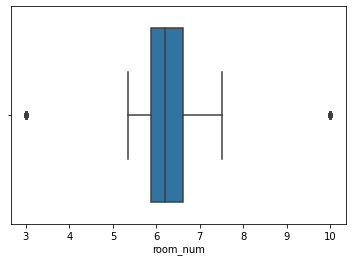

In [45]:
sns.boxplot(House_Price['room_num'])

In [46]:
House_Price['age'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: age, dtype: float64

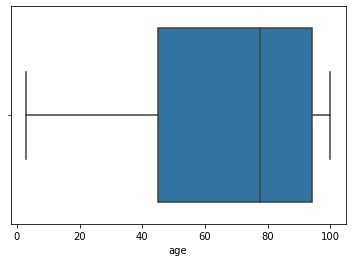

In [47]:
sns.boxplot(House_Price['age'])

In [48]:
print(House_Price['age'].skew())

-0.5989626398812962


In [49]:
House_Price['teachers'].describe()

count    506.000000
mean      21.544466
std        2.164946
min       18.000000
25%       19.800000
50%       20.950000
75%       22.600000
max       27.400000
Name: teachers, dtype: float64

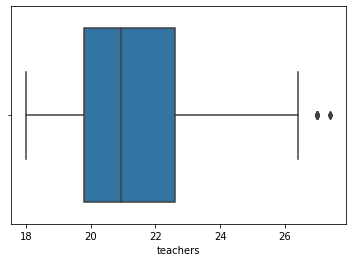

In [50]:
sns.boxplot(House_Price['teachers'])

In [51]:
print(House_Price['teachers'].quantile(0.50))
print(House_Price['teachers'].quantile(0.95))

20.95
25.3


In [52]:
House_Price['teachers'] = np.where(House_Price['teachers'] > 25.3, 20.95, House_Price['teachers'])
House_Price['teachers'].describe()

count    506.000000
mean      21.342787
std        1.915190
min       18.000000
25%       19.800000
50%       20.925000
75%       22.550000
max       25.300000
Name: teachers, dtype: float64

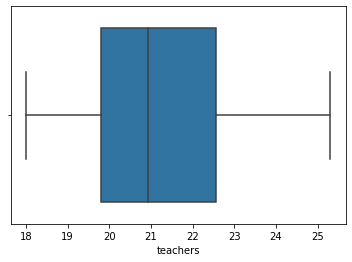

In [53]:
sns.boxplot(House_Price['teachers'])

In [54]:
House_Price['poor_prop'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: poor_prop, dtype: float64

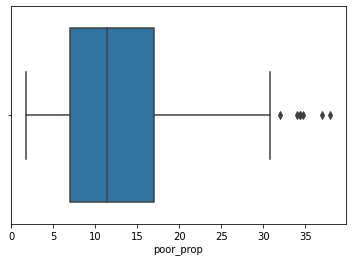

In [55]:
sns.boxplot(House_Price['poor_prop'])

In [56]:

print(House_Price['poor_prop'].quantile(0.95))

26.8075


In [57]:
House_Price['poor_prop'] = np.where(House_Price['poor_prop'] > 26.8075, 30, House_Price['poor_prop'])
House_Price['poor_prop'].describe()

count    506.000000
mean      12.616423
std        7.017667
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       30.000000
Name: poor_prop, dtype: float64

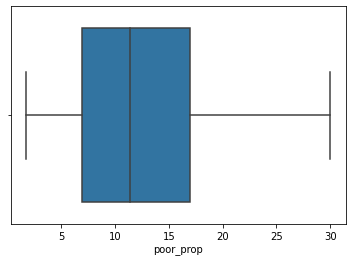

In [58]:
sns.boxplot(House_Price['poor_prop'])

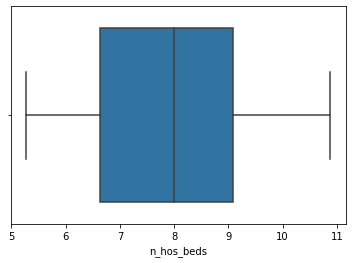

In [59]:
sns.boxplot(House_Price['n_hos_beds'])

In [60]:
House_Price[House_Price.isna().any(axis=1)]


,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
50,19.7,35.64,0.439,5.963,45.7,23.20,13.45,1,NaN,11.1576,River,21,0.040389,1,6.8150
112,18.8,40.01,0.547,5.913,92.9,22.20,16.21,1,NaN,15.1504,River,35,0.057644,0,2.3525
215,25.0,40.59,0.489,6.182,42.4,21.40,9.47,1,NaN,12.2000,Lake,30,0.047925,0,3.9475
260,33.8,33.97,0.647,7.203,81.8,20.95,9.59,1,NaN,11.2704,Lake,21,0.068041,1,2.1125
359,22.6,48.10,0.770,6.112,81.3,19.80,12.67,0,NaN,14.1808,Lake,26,0.074239,0,2.5075
403,8.3,48.10,0.693,5.349,96.0,19.80,19.77,1,NaN,15.0664,River,40,0.067689,1,1.7025
416,7.5,48.10,0.679,6.782,90.8,19.80,25.79,1,NaN,10.0600,River,35,0.064619,1,1.8200
496,19.7,39.69,0.585,5.390,72.9,20.80,21.14,0,NaN,12.1576,River,44,0.061026,0,2.7975


In [61]:
House_Price['n_hos_beds'].isna().sum()

8

In [62]:
House_Price['n_hos_beds'] = np.where(House_Price['n_hos_beds'].isnull() == True , np.mean(House_Price['n_hos_beds']), House_Price['n_hos_beds'])

In [63]:
House_Price['n_hos_beds'].isna().sum()

0

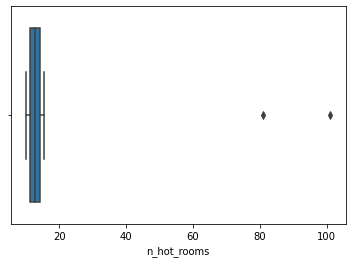

In [64]:
sns.boxplot(House_Price['n_hot_rooms'])

In [65]:
print(House_Price['n_hot_rooms'].quantile(0.50))
print(House_Price['n_hot_rooms'].quantile(0.95))

12.719999999999999
15.1948


In [66]:
House_Price['n_hot_rooms'] = np.where(House_Price['n_hot_rooms'] >15.1948, 12.719999999999999, House_Price['n_hot_rooms'])
House_Price['n_hot_rooms'].describe()

count    506.000000
mean      12.610585
std        1.577717
min       10.057600
25%       11.189800
50%       12.560000
75%       14.134200
max       15.191200
Name: n_hot_rooms, dtype: float64

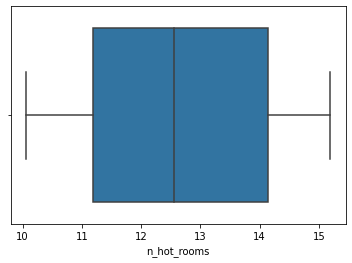

In [67]:
sns.boxplot(House_Price['n_hot_rooms'])

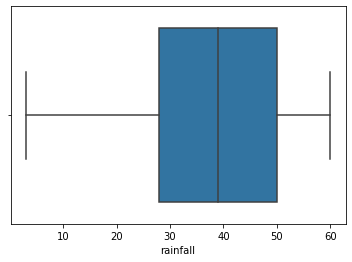

In [68]:
sns.boxplot(House_Price['rainfall'])

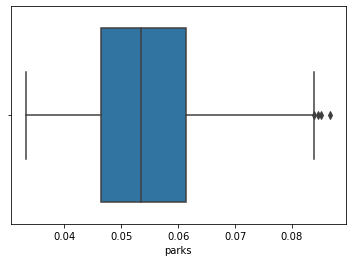

In [69]:
sns.boxplot(House_Price['parks'])

In [70]:
print(House_Price['parks'].skew())

0.5339912357505223


<Figure size 2160x1440 with 0 Axes>

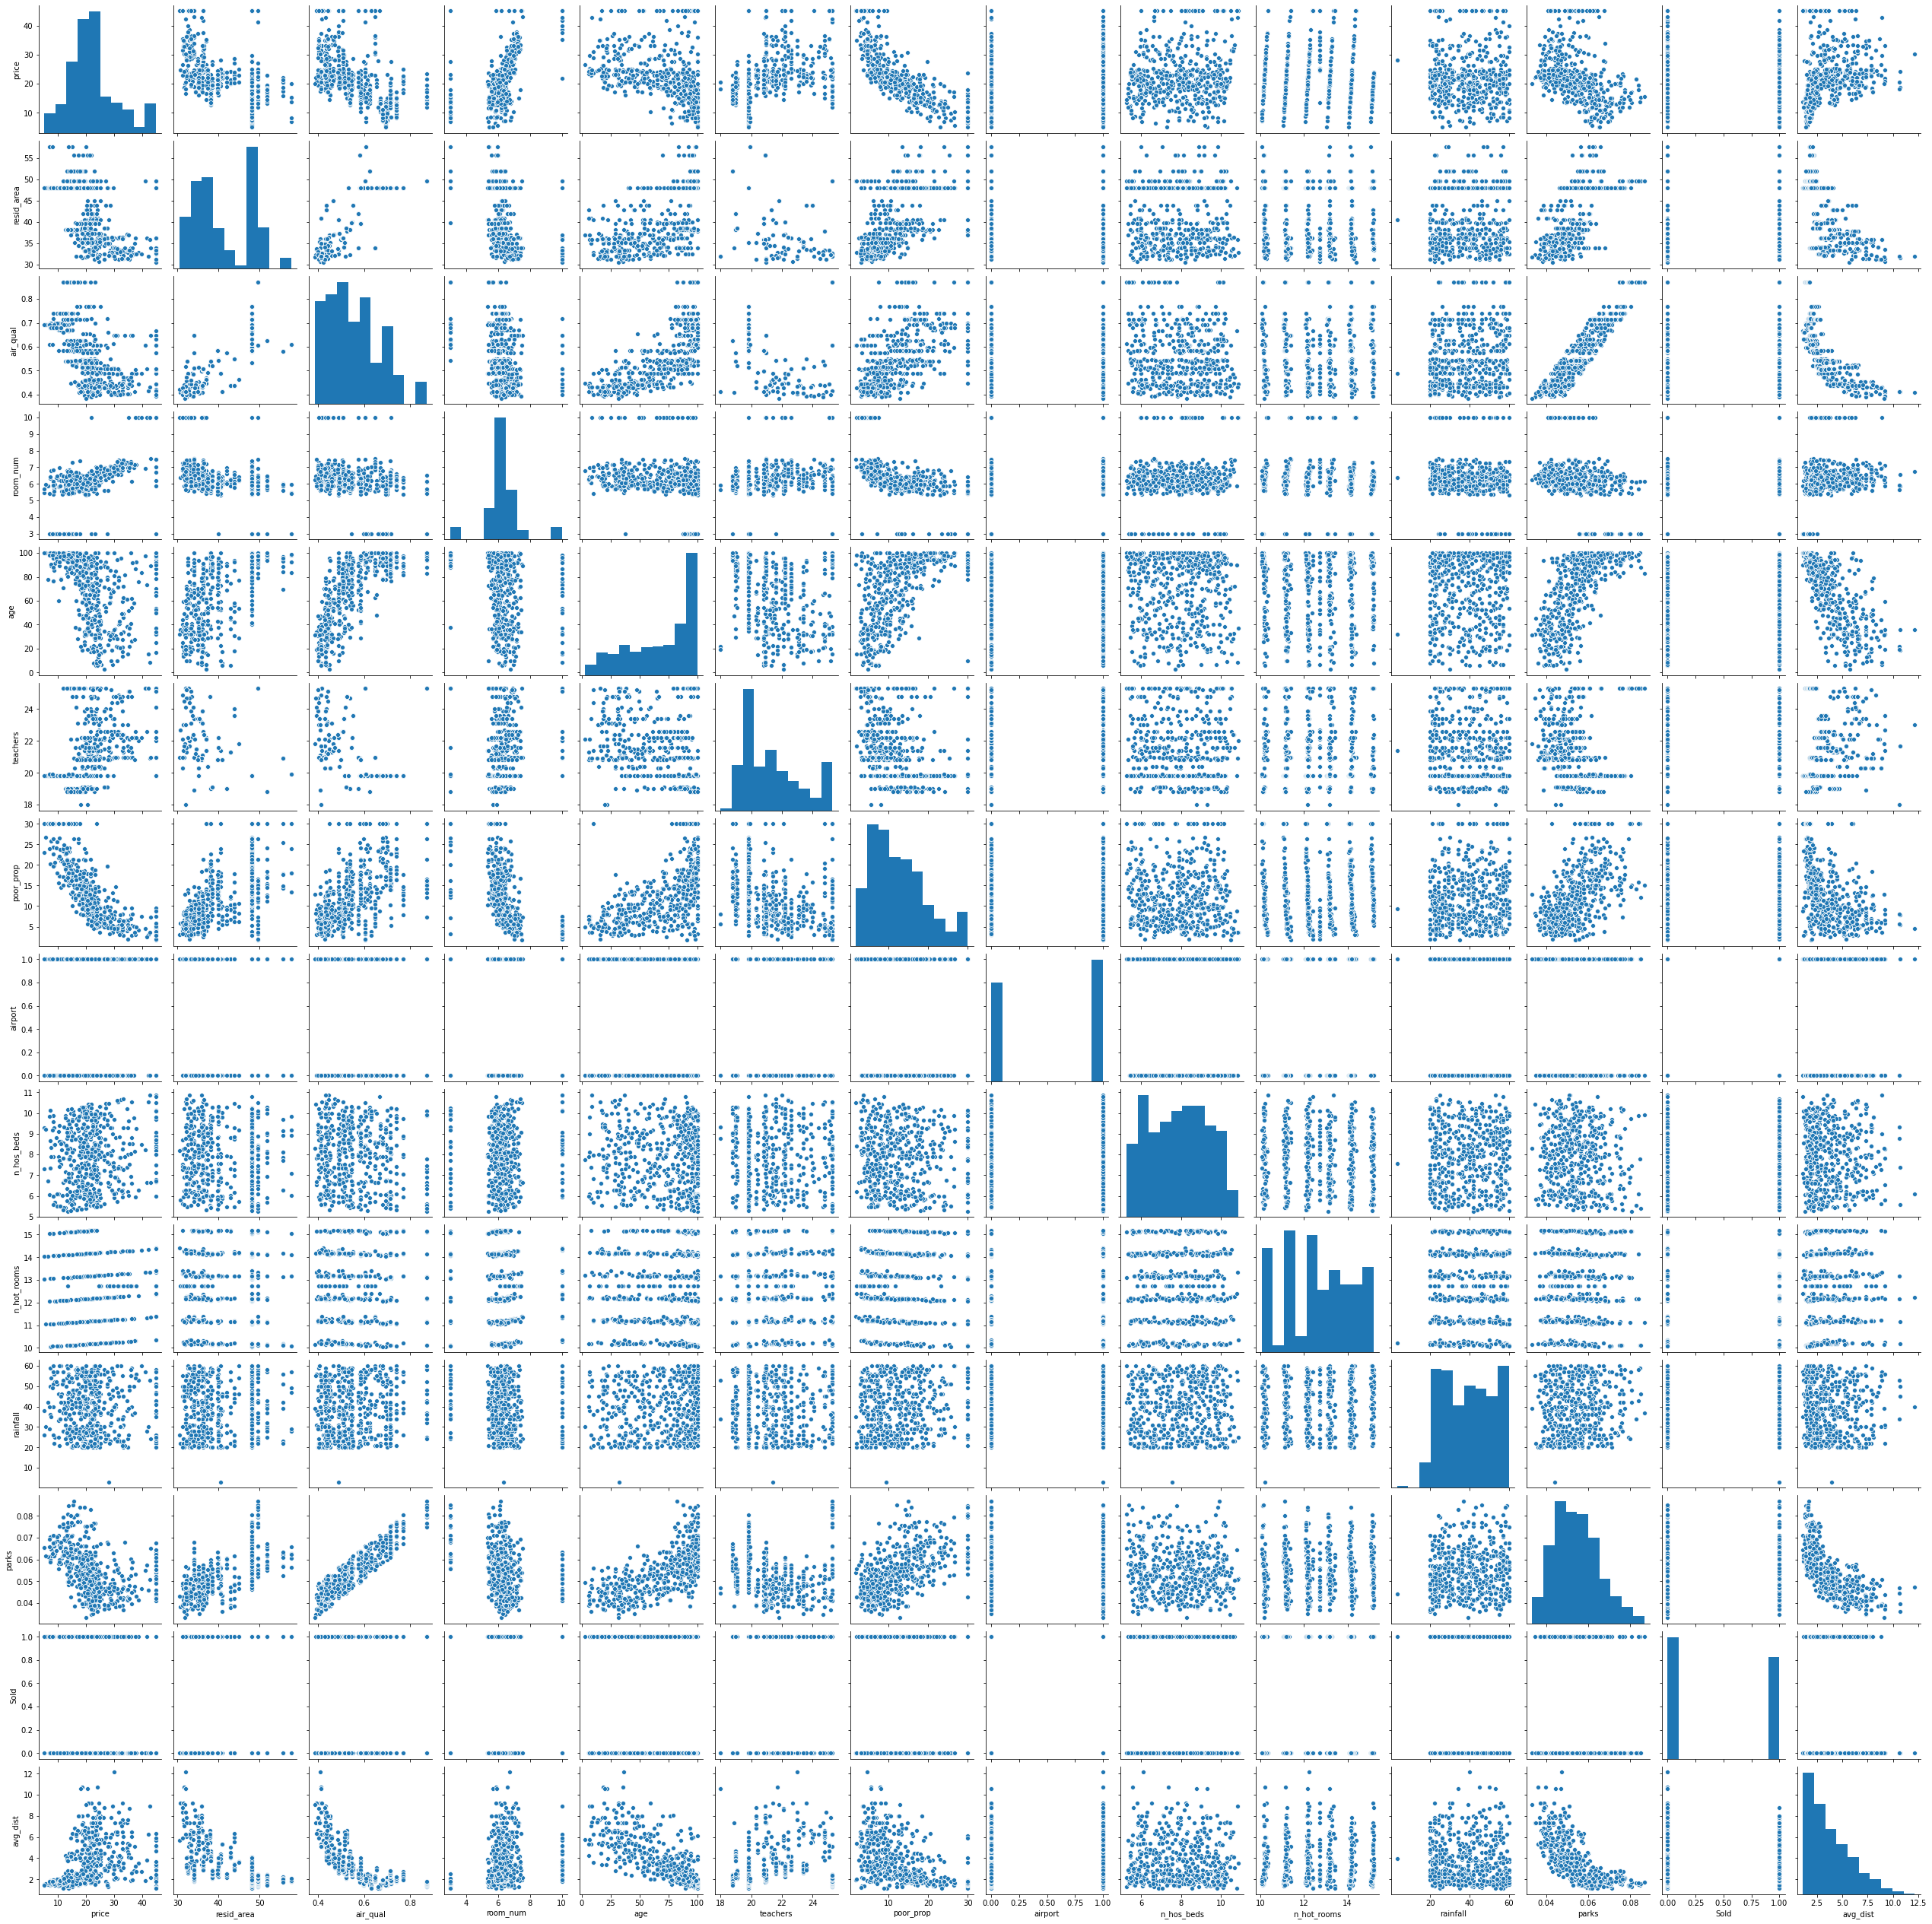

In [71]:
plt.figure(figsize = (30,20))
sns.pairplot(House_Price)

In [72]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status df.
status = pd.get_dummies(House_Price['waterbody'],drop_first=True)

In [73]:
#Adding the results to the master dataframe
House_Price= pd.concat([House_Price,status],axis=1)

In [74]:
House_Price.drop(['waterbody'], axis=1, inplace = True)
House_Price.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,Lake and River,None,River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,1,5.480,11.1920,23,0.049347,0,4.0875,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,0,7.332,12.1728,42,0.046146,1,4.9675,0,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,0,7.394,12.7200,38,0.045764,0,4.9675,0,1,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,1,9.268,11.2672,45,0.047151,0,6.0650,0,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,0,8.824,11.2896,55,0.039474,0,6.0625,0,0,0


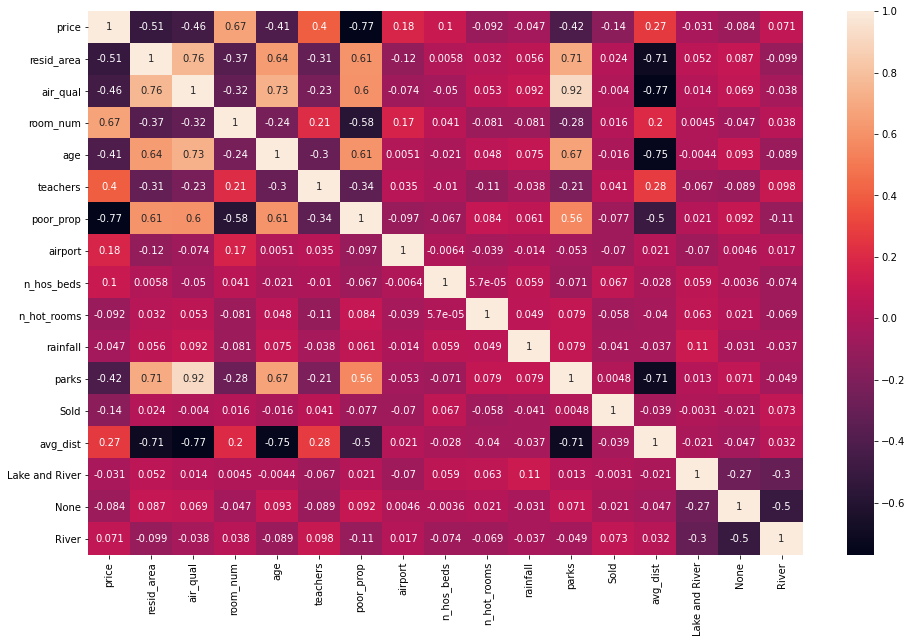

In [75]:
plt.figure(figsize = (16,10))
sns.heatmap(House_Price.corr(),annot = True)

In [76]:
House_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           506 non-null    float64
 1   resid_area      506 non-null    float64
 2   air_qual        506 non-null    float64
 3   room_num        506 non-null    float64
 4   age             506 non-null    float64
 5   teachers        506 non-null    float64
 6   poor_prop       506 non-null    float64
 7   airport         506 non-null    int64  
 8   n_hos_beds      506 non-null    float64
 9   n_hot_rooms     506 non-null    float64
 10  rainfall        506 non-null    int64  
 11  parks           506 non-null    float64
 12  Sold            506 non-null    int64  
 13  avg_dist        506 non-null    float64
 14  Lake and River  506 non-null    uint8  
 15  None            506 non-null    uint8  
 16  River           506 non-null    uint8  
dtypes: float64(11), int64(3), uint8(3)


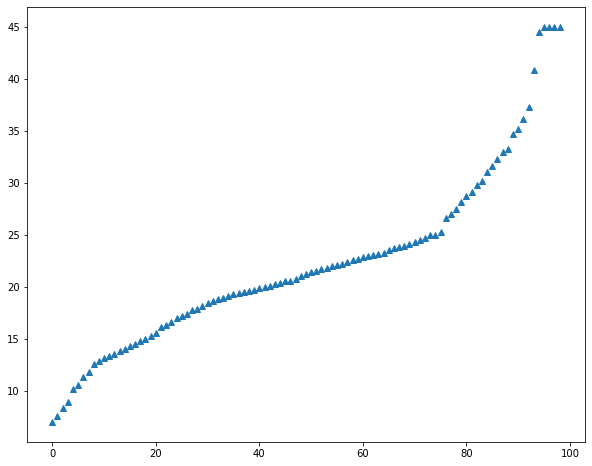

In [77]:

#check outliers in price

p=[ ]
for i in range(1,100):
    xyz = (House_Price['price'].quantile(i/100))
    p.append(xyz)
p = pd.DataFrame(p)

plt.figure(figsize=(10,8))
plt.plot(p, '^')

In [78]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


House_Price_cont =House_Price.drop(['Sold','Lake and River','None','River'], axis = 1)

House_Price_cont = sc.fit_transform(House_Price_cont)

In [79]:
House_Price_cont

array([[ 0.19004157, -1.2879095 , -0.14421743, ..., -1.29440816,
        -0.48076306,  0.13898634],
       [-0.08661449, -0.59338101, -0.74026221, ...,  0.22543063,
        -0.78218286,  0.55728164],
       [ 1.42346646, -0.59338101, -0.74026221, ..., -0.09453543,
        -0.81811469,  0.55728164],
       ...,
       [ 0.17851423,  0.11573841,  0.15812412, ..., -0.65447604,
         0.29357329, -0.77365796],
       [-0.04050514,  0.11573841,  0.15812412, ...,  0.62538821,
         0.58749353, -0.6678958 ],
       [-0.38632521,  0.11573841,  0.15812412, ...,  0.46540518,
         0.55375216, -0.61323221]])

In [80]:
House_Price_cont = pd.DataFrame(House_Price_cont,columns='price resid_area air_qual room_num age teachers poor_prop airport n_hos_beds n_hot_rooms rainfall parks avg_distance'.split())

In [81]:
House_Price_cont

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,avg_distance
0,0.190042,-1.287909,-0.144217,0.234729,-0.120013,1.754675,-1.089248,0.902009,-1.653421,-0.900028,-1.294408,-0.480763,0.138986
1,-0.086614,-0.593381,-0.740262,0.107489,0.367166,0.448030,-0.495872,-1.108637,-0.387954,-0.277755,0.225431,-0.782183,0.557282
2,1.423466,-0.593381,-0.740262,0.738732,-0.265812,0.448030,-1.224755,-1.108637,-0.345589,0.069419,-0.094535,-0.818115,0.557282
3,1.273611,-1.306878,-0.835284,0.584226,-0.809889,-0.022363,-1.380231,0.902009,0.934910,-0.852317,0.465405,-0.687571,1.078962
4,1.596376,-1.306878,-0.835284,0.707335,-0.511180,-0.022363,-1.039325,-1.108637,0.631526,-0.838105,1.265320,-1.410280,1.077774
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.005604,0.115738,0.158124,0.249601,0.018673,-1.224476,-0.420273,-1.108637,0.989574,-0.273694,-0.974442,0.146086,-0.626304
502,-0.201888,0.115738,0.158124,-0.141208,0.288933,-1.224476,-0.504430,0.902009,-0.879928,0.351624,-1.534383,0.513037,-0.716618
503,0.178514,0.115738,0.158124,0.566049,0.797449,-1.224476,-0.995107,-1.108637,-1.654788,-0.266081,-0.654476,0.293573,-0.773658
504,-0.040505,0.115738,0.158124,0.415674,0.736996,-1.224476,-0.875290,0.902009,0.027491,1.627639,0.625388,0.587494,-0.667896


In [82]:
y=House_Price[['Sold','Lake and River','None','River']]

In [83]:
House_Price=pd.concat([House_Price_cont,y],axis=1)

In [84]:
House_Price

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,rainfall,parks,avg_distance,Sold,Lake and River,None,River
0,0.190042,-1.287909,-0.144217,0.234729,-0.120013,1.754675,-1.089248,0.902009,-1.653421,-0.900028,-1.294408,-0.480763,0.138986,0,0,0,1
1,-0.086614,-0.593381,-0.740262,0.107489,0.367166,0.448030,-0.495872,-1.108637,-0.387954,-0.277755,0.225431,-0.782183,0.557282,1,0,0,0
2,1.423466,-0.593381,-0.740262,0.738732,-0.265812,0.448030,-1.224755,-1.108637,-0.345589,0.069419,-0.094535,-0.818115,0.557282,0,0,1,0
3,1.273611,-1.306878,-0.835284,0.584226,-0.809889,-0.022363,-1.380231,0.902009,0.934910,-0.852317,0.465405,-0.687571,1.078962,0,0,0,0
4,1.596376,-1.306878,-0.835284,0.707335,-0.511180,-0.022363,-1.039325,-1.108637,0.631526,-0.838105,1.265320,-1.410280,1.077774,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.005604,0.115738,0.158124,0.249601,0.018673,-1.224476,-0.420273,-1.108637,0.989574,-0.273694,-0.974442,0.146086,-0.626304,1,1,0,0
502,-0.201888,0.115738,0.158124,-0.141208,0.288933,-1.224476,-0.504430,0.902009,-0.879928,0.351624,-1.534383,0.513037,-0.716618,1,1,0,0
503,0.178514,0.115738,0.158124,0.566049,0.797449,-1.224476,-0.995107,-1.108637,-1.654788,-0.266081,-0.654476,0.293573,-0.773658,1,0,1,0
504,-0.040505,0.115738,0.158124,0.415674,0.736996,-1.224476,-0.875290,0.902009,0.027491,1.627639,0.625388,0.587494,-0.667896,1,0,1,0


#SPLITTING THE DATA INTO TRAIN AND TEST DATA FOR BUILDING THE MODEL AND FOR PREDICTING THE MODEL TO THE TEST DATA

In [85]:
x=House_Price[['price', 'resid_area','air_qual','room_num','age', 'teachers', 'poor_prop', 'airport','n_hos_beds', 'n_hot_rooms','rainfall', 'parks', 'avg_distance','Lake and River','None', 'River']]
y=House_Price['Sold']

In [86]:
# Train Test Splitting 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (354, 16)
x_test  (152, 16)
y_train  (354,)
y_test  (152,)


In [87]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)


In [88]:
model

LogisticRegression()

In [89]:
##probability of test data
pred_prob=model.predict_proba(x_test)[:,1]

In [90]:
pred_prob

array([0.52331177, 0.02619471, 0.47531066, 0.7743073 , 0.37577682,
       0.70839756, 0.5676175 , 0.55275219, 0.75570121, 0.71930709,
       0.7532122 , 0.51535671, 0.61991636, 0.13266788, 0.3028246 ,
       0.40677865, 0.58502944, 0.17408037, 0.4939333 , 0.79900991,
       0.5827496 , 0.85385543, 0.42529282, 0.50352566, 0.79222175,
       0.28861596, 0.44699487, 0.32379799, 0.40504836, 0.7608211 ,
       0.37617047, 0.22279968, 0.52273254, 0.45431534, 0.80530234,
       0.59321337, 0.71421316, 0.02461966, 0.83074175, 0.54922294,
       0.55950963, 0.52169578, 0.83823457, 0.63240198, 0.83959017,
       0.57506599, 0.26959722, 0.58596571, 0.11147275, 0.47902231,
       0.87996593, 0.28685288, 0.45482119, 0.13027982, 0.62391633,
       0.23448735, 0.57439143, 0.32392718, 0.93856947, 0.24141278,
       0.28835861, 0.68718027, 0.4057062 , 0.42880632, 0.31123081,
       0.69962401, 0.46336405, 0.33190572, 0.08699727, 0.65429772,
       0.62925384, 0.55942318, 0.84853947, 0.56614249, 0.43708

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)




In [92]:
pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [93]:
print(accuracy_score(y_test,pred))

0.6513157894736842


In [94]:
print(confusion_matrix(y_test,pred))

[[59 30]
 [23 40]]


In [95]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69        89
           1       0.57      0.63      0.60        63

    accuracy                           0.65       152
   macro avg       0.65      0.65      0.65       152
weighted avg       0.66      0.65      0.65       152



In [96]:
from sklearn import metrics
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)


[[59 30]
 [23 40]]


In [97]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [98]:
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, pred))

0.6513157894736842
0.6513157894736842


In [99]:
TN

59

In [100]:
TPR=TP/(TP+FN)
print(TPR)

0.6349206349206349


In [101]:
FPR=TP/(TP+FP)
print(FPR)

0.5714285714285714


In [102]:
sensitivity = TP / float(FN + TP)

print(sensitivity)


0.6349206349206349


In [103]:

# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))

0.6349206349206349


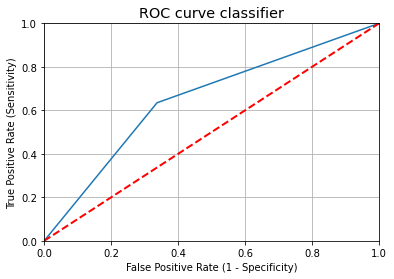

In [104]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))

0.6489209916176208


In [106]:
f1 = metrics.f1_score(y_test, pred)
print(f1)

0.6015037593984962


In [107]:
###how to change the threshold value

In [108]:
y_pred_class_adjusted=np.where(pred_prob>0.3,1,0)

In [109]:
f1 = metrics.f1_score(y_test, y_pred_class_adjusted)
print(f1)

0.6628571428571429


In [110]:
from sklearn import metrics
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class_adjusted)
print(confusion)

[[35 54]
 [ 5 58]]


In [111]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [112]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.9206349206349206


In [113]:
print((TP + TN) / (TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class_adjusted))

0.6118421052631579
0.6118421052631579


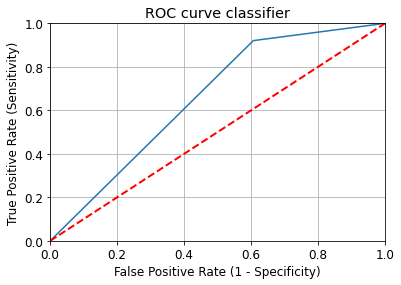

In [114]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_class_adjusted)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [115]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, y_pred_class_adjusted))

0.6569466738006062


In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

           feature       VIF
0            price  3.837742
1       resid_area  2.981724
2         air_qual  8.659330
3         room_num  1.964812
4              age  3.217863
5         teachers  1.342729
6        poor_prop  3.495432
7          airport  1.065650
8       n_hos_beds  1.071363
9      n_hot_rooms  1.046747
10        rainfall  1.039878
11           parks  6.459113
12    avg_distance  3.689898
13  Lake and River  1.029500
14            None  1.032288
15           River  1.048725


In [117]:
import statsmodels.api as sm
X_train_sm = x_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const             0.426547
price            -0.368559
resid_area       -0.038641
air_qual         -0.155455
room_num          0.082004
age              -0.024544
teachers          0.057824
poor_prop        -0.245533
airport          -0.019813
n_hos_beds        0.073816
n_hot_rooms      -0.018519
rainfall         -0.024939
parks             0.077853
avg_distance     -0.204906
Lake and River    0.049166
None              0.002580
River             0.102345
dtype: float64

In [118]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sold   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     5.093
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           1.63e-09
Time:                        09:19:49   Log-Likelihood:                -218.03
No. Observations:                 354   AIC:                             470.1
Df Residuals:                     337   BIC:                             535.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4265      0.057      7.

In [119]:
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, x_train)
result = model.fit(method='newton')
 
result.params
  
result.predict(x_test)
  
result.predict(x_test >= 0.5).astype(int)
  
result.pred_table()
  
result.summary()

Optimization terminated successfully.
         Current function value: 0.582799
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  354
Model:                          Logit   Df Residuals:                      338
Method:                           MLE   Df Model:                           15
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.1573
Time:                        09:19:50   Log-Likelihood:                -206.31
converged:                       True   LL-Null:                       -244.81
Covariance Type:            nonrobust   LLR p-value:                 2.463e-10
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
price             -1.9966      0.310     -6.444      0.000      -2.604      -1.389
resid_area        -0.2054      0.203     -1.010      0.312      -0.604       0.193
air_qual          -0.7343      0.358     -2.054      0.040      -1.435      -0.034
room_num           0.5317      0.202      2.627      0.009       0.135       0.928
age               -0.1315      0.222     -0.593      0.553      -0.567       0.303
teachers           0.3080      0.144      2.144      0.032       0.026       0.589
poor_prop         -1.3009      0.264     -4.928      0.000      -1.818      -0.784
airport           -0.1060      0.123     -0.858      0.391      -0.348       0.136
n_hos_beds         0.3497      0.124      2.818      0.005       0.107       0.593
n_hot_rooms       -0.0847      0.119     -0.709      0.478      -0.319       0.149
rainfall          -0.0993      0.124     -0.798      0.425      -0.343       0.144
parks              0.3574      0.307      1.164      0.244      -0.244       0.959
avg_distance      -1.0588      0.261     -4.060      0.000      -1.570      -0.548
Lake and River    -0.1844      0.327     -0.563      0.573      -0.826       0.457
None              -0.4118      0.226     -1.821      0.069      -0.855       0.031
River              0.1087      0.200      0.544      0.586      -0.283       0.500
==================================================================================
"""

In [120]:
x1=House_Price[['price', 'resid_area','air_qual','room_num','teachers', 'poor_prop', 'airport','n_hos_beds', 'n_hot_rooms', 'rainfall', 'parks', 'avg_distance','Lake and River','None', 'River']]
y1=House_Price['Sold']


In [121]:
# Train Test Splitting 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)


x_train  (354, 15)
x_test  (152, 15)
y_train  (354,)
y_test  (152,)


In [122]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)


In [123]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)


In [124]:
print(accuracy_score(y_test,pred))



0.6578947368421053


In [125]:
print(confusion_matrix(y_test,pred))


[[62 27]
 [25 38]]


In [126]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70        89
           1       0.58      0.60      0.59        63

    accuracy                           0.66       152
   macro avg       0.65      0.65      0.65       152
weighted avg       0.66      0.66      0.66       152



In [127]:
from sklearn import metrics
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

[[62 27]
 [25 38]]


In [128]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [129]:
TPR=TP/(TP+FN)
print(TPR)

0.6031746031746031


In [130]:
FPR=TP/(TP+FP)
print(FPR)

0.5846153846153846


In [131]:
sensitivity = TP / float(FN + TP)
print(sensitivity)


0.6031746031746031


In [132]:
# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))


0.6031746031746031


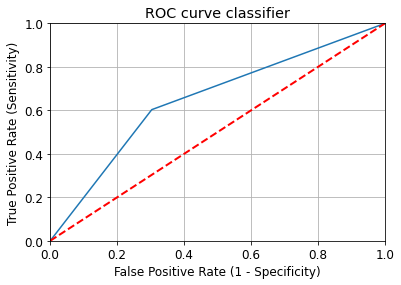

In [133]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))


0.6499019083288746


In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

           feature       VIF
0            price  3.833904
1       resid_area  2.979605
2         air_qual  8.281210
3         room_num  1.944953
4         teachers  1.336807
5        poor_prop  3.298269
6          airport  1.046272
7       n_hos_beds  1.070590
8      n_hot_rooms  1.045160
9         rainfall  1.037856
10           parks  6.443510
11    avg_distance  3.077201
12  Lake and River  1.029267
13            None  1.029295
14           River  1.047893


In [136]:
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, x_train)
result = model.fit(method='newton')
 
result.params
  
result.predict(x_test)
  
result.predict(x_test >= 0.5).astype(int)
  
result.pred_table()
  
result.summary()

Optimization terminated successfully.
         Current function value: 0.583296
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  354
Model:                          Logit   Df Residuals:                      339
Method:                           MLE   Df Model:                           14
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.1565
Time:                        09:19:59   Log-Likelihood:                -206.49
converged:                       True   LL-Null:                       -244.81
Covariance Type:            nonrobust   LLR p-value:                 1.180e-10
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
price             -1.9863      0.308     -6.447      0.000      -2.590      -1.382
resid_area        -0.1976      0.203     -0.975      0.330      -0.595       0.200
air_qual          -0.7734      0.351     -2.201      0.028      -1.462      -0.085
room_num           0.5163      0.200      2.582      0.010       0.124       0.908
teachers           0.3105      0.144      2.160      0.031       0.029       0.592
poor_prop         -1.3410      0.256     -5.233      0.000      -1.843      -0.839
airport           -0.1179      0.122     -0.968      0.333      -0.357       0.121
n_hos_beds         0.3521      0.124      2.838      0.005       0.109       0.595
n_hot_rooms       -0.0869      0.119     -0.729      0.466      -0.321       0.147
rainfall          -0.1012      0.124     -0.814      0.416      -0.345       0.142
parks              0.3642      0.307      1.187      0.235      -0.237       0.965
avg_distance      -0.9941      0.235     -4.233      0.000      -1.454      -0.534
Lake and River    -0.1780      0.327     -0.544      0.587      -0.819       0.463
None              -0.4196      0.226     -1.858      0.063      -0.862       0.023
River              0.1164      0.199      0.585      0.559      -0.274       0.506
==================================================================================
"""

In [137]:
x2=House_Price[['price', 'resid_area','air_qual','room_num','teachers', 'poor_prop', 'airport','n_hos_beds','n_hot_rooms','rainfall', 'avg_distance','Lake and River','None','River']]
y2=House_Price['Sold']

In [138]:
# Train Test Splitting 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (354, 14)
x_test  (152, 14)
y_train  (354,)
y_test  (152,)


In [139]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)


In [140]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)


In [141]:
pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [142]:
print(accuracy_score(y_test,pred))



0.6710526315789473


In [143]:
print(confusion_matrix(y_test,pred))


[[61 28]
 [22 41]]


In [144]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        89
           1       0.59      0.65      0.62        63

    accuracy                           0.67       152
   macro avg       0.66      0.67      0.67       152
weighted avg       0.68      0.67      0.67       152



In [145]:
from sklearn import metrics
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

[[61 28]
 [22 41]]


In [146]:
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [147]:
TPR=TP/(TP+FN)
print(TPR)

0.6507936507936508


In [148]:
FPR=TP/(TP+FP)
print(FPR)

0.5942028985507246


In [149]:
sensitivity = TP / float(FN + TP)
print(sensitivity)


0.6507936507936508


In [150]:
sensitivity = TP / float(FN + TP)
print(sensitivity)


0.6507936507936508


In [151]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

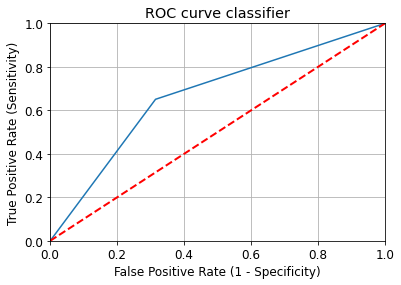

In [152]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [153]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))


0.6680934546103086


In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

           feature       VIF
0            price  3.817865
1       resid_area  2.969495
2         air_qual  3.442987
3         room_num  1.944338
4         teachers  1.336750
5        poor_prop  3.284849
6          airport  1.045358
7       n_hos_beds  1.062214
8      n_hot_rooms  1.032065
9         rainfall  1.037768
10    avg_distance  3.076420
11  Lake and River  1.028916
12            None  1.026506
13           River  1.038857


In [155]:
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, x_train)
result = model.fit(method='newton')
 
result.params
  
result.predict(x_test)
  
result.predict(x_test >= 0.5).astype(int)
  
result.pred_table()
  
result.summary()

Optimization terminated successfully.
         Current function value: 0.585301
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  354
Model:                          Logit   Df Residuals:                      340
Method:                           MLE   Df Model:                           13
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.1536
Time:                        09:20:07   Log-Likelihood:                -207.20
converged:                       True   LL-Null:                       -244.81
Covariance Type:            nonrobust   LLR p-value:                 8.646e-11
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
price             -1.9694      0.307     -6.406      0.000      -2.572      -1.367
resid_area        -0.1827      0.201     -0.907      0.364      -0.578       0.212
air_qual          -0.4566      0.227     -2.013      0.044      -0.901      -0.012
room_num           0.5176      0.201      2.581      0.010       0.125       0.911
teachers           0.3093      0.144      2.149      0.032       0.027       0.591
poor_prop         -1.3233      0.256     -5.172      0.000      -1.825      -0.822
airport           -0.1120      0.121     -0.923      0.356      -0.350       0.126
n_hos_beds         0.3394      0.123      2.754      0.006       0.098       0.581
n_hot_rooms       -0.0712      0.118     -0.604      0.546      -0.303       0.160
rainfall          -0.1062      0.124     -0.857      0.391      -0.349       0.137
avg_distance      -0.9928      0.234     -4.246      0.000      -1.451      -0.535
Lake and River    -0.1766      0.326     -0.541      0.588      -0.816       0.463
None              -0.4055      0.224     -1.809      0.070      -0.845       0.034
River              0.0929      0.198      0.470      0.639      -0.295       0.480
==================================================================================
"""

In [156]:
x3=House_Price[['price', 'air_qual','room_num','teachers', 'poor_prop', 'airport','n_hos_beds','n_hot_rooms','rainfall', 'avg_distance','Lake and River','None','River']]
y3=House_Price['Sold']

In [157]:
# Train Test Splitting 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x3, y3, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)


x_train  (354, 13)
x_test  (152, 13)
y_train  (354,)
y_test  (152,)


In [158]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)


In [159]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)


In [160]:
pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [161]:
print(accuracy_score(y_test,pred))



0.6776315789473685


In [162]:
print(confusion_matrix(y_test,pred))


[[62 27]
 [22 41]]


In [163]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        89
           1       0.60      0.65      0.63        63

    accuracy                           0.68       152
   macro avg       0.67      0.67      0.67       152
weighted avg       0.68      0.68      0.68       152



In [164]:
TPR=TP/(TP+FN)
print(TPR)

0.6507936507936508


In [165]:
FPR=TP/(TP+FP)
print(FPR)

0.5942028985507246


In [166]:
sensitivity = TP / float(FN + TP)
print(sensitivity)


0.6507936507936508


In [167]:
# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))


0.6507936507936508


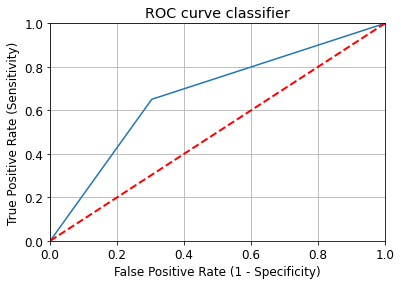

In [168]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [169]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))


0.6737114321383983


In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

           feature       VIF
0            price  3.683613
1         air_qual  3.002469
2         room_num  1.937640
3         teachers  1.335837
4        poor_prop  3.281227
5          airport  1.043797
6       n_hos_beds  1.054824
7      n_hot_rooms  1.024056
8         rainfall  1.037450
9     avg_distance  2.801983
10  Lake and River  1.021768
11            None  1.026446
12           River  1.032666


In [171]:
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, x_train)
result = model.fit(method='newton')
 
result.params
  
result.predict(x_test)
  
result.predict(x_test >= 0.5).astype(int)
  
result.pred_table()
  
result.summary()

Optimization terminated successfully.
         Current function value: 0.586466
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  354
Model:                          Logit   Df Residuals:                      341
Method:                           MLE   Df Model:                           12
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.1520
Time:                        09:20:12   Log-Likelihood:                -207.61
converged:                       True   LL-Null:                       -244.81
Covariance Type:            nonrobust   LLR p-value:                 4.770e-11
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
price             -1.9213      0.301     -6.382      0.000      -2.511      -1.331
air_qual          -0.5272      0.214     -2.469      0.014      -0.946      -0.109
room_num           0.5178      0.199      2.599      0.009       0.127       0.908
teachers           0.3089      0.144      2.144      0.032       0.026       0.591
poor_prop         -1.3316      0.256     -5.208      0.000      -1.833      -0.830
airport           -0.1079      0.121     -0.892      0.373      -0.345       0.129
n_hos_beds         0.3317      0.123      2.700      0.007       0.091       0.572
n_hot_rooms       -0.0603      0.117     -0.515      0.607      -0.290       0.169
rainfall          -0.1020      0.124     -0.823      0.411      -0.345       0.141
avg_distance      -0.9324      0.223     -4.184      0.000      -1.369      -0.496
Lake and River    -0.2052      0.324     -0.634      0.526      -0.840       0.429
None              -0.4022      0.224     -1.799      0.072      -0.840       0.036
River              0.1048      0.197      0.531      0.595      -0.282       0.491
==================================================================================
"""

In [172]:
x4=House_Price[['price', 'air_qual','room_num','teachers', 'poor_prop', 'airport','n_hos_beds','rainfall', 'avg_distance','Lake and River','None','River']]
y4=House_Price['Sold']

In [173]:
# Train Test Splitting 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x4, y4, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (354, 12)
x_test  (152, 12)
y_train  (354,)
y_test  (152,)


In [174]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)


In [175]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)


In [176]:
pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [177]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.6776315789473685
[[61 28]
 [21 42]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        89
           1       0.60      0.67      0.63        63

    accuracy                           0.68       152
   macro avg       0.67      0.68      0.67       152
weighted avg       0.68      0.68      0.68       152



In [178]:
TPR=TP/(TP+FN)
print(TPR)


0.6507936507936508


In [179]:
FPR=TP/(TP+FP)
print(FPR)


0.5942028985507246


In [180]:
sensitivity = TP / float(FN + TP)
print(sensitivity)


0.6507936507936508


In [181]:
# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))


0.6666666666666666


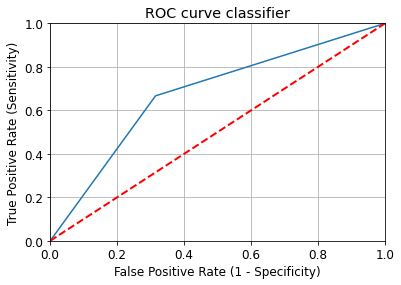

In [182]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [183]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))


0.6760299625468165


In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

           feature       VIF
0            price  3.675230
1         air_qual  2.999602
2         room_num  1.937623
3         teachers  1.334079
4        poor_prop  3.281188
5          airport  1.040552
6       n_hos_beds  1.046728
7         rainfall  1.037445
8     avg_distance  2.801856
9   Lake and River  1.021072
10            None  1.025670
11           River  1.032653


In [185]:
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, x_train)
result = model.fit(method='newton')
 
result.params
  
result.predict(x_test)
  
result.predict(x_test >= 0.5).astype(int)
  
result.pred_table()
  
result.summary()

Optimization terminated successfully.
         Current function value: 0.586840
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  354
Model:                          Logit   Df Residuals:                      342
Method:                           MLE   Df Model:                           11
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.1514
Time:                        09:20:18   Log-Likelihood:                -207.74
converged:                       True   LL-Null:                       -244.81
Covariance Type:            nonrobust   LLR p-value:                 1.986e-11
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
price             -1.9125      0.300     -6.379      0.000      -2.500      -1.325
air_qual          -0.5258      0.213     -2.463      0.014      -0.944      -0.107
room_num           0.5153      0.199      2.593      0.010       0.126       0.905
teachers           0.3111      0.144      2.160      0.031       0.029       0.593
poor_prop         -1.3313      0.256     -5.202      0.000      -1.833      -0.830
airport           -0.1057      0.121     -0.874      0.382      -0.343       0.131
n_hos_beds         0.3272      0.122      2.671      0.008       0.087       0.567
rainfall          -0.1015      0.124     -0.820      0.412      -0.344       0.141
avg_distance      -0.9370      0.223     -4.196      0.000      -1.375      -0.499
Lake and River    -0.2105      0.323     -0.651      0.515      -0.844       0.423
None              -0.4055      0.224     -1.814      0.070      -0.844       0.033
River              0.1054      0.197      0.535      0.593      -0.281       0.492
==================================================================================
"""

In [186]:
x5=House_Price[['price', 'air_qual','room_num','teachers', 'poor_prop', 'airport','n_hos_beds', 'avg_distance','Lake and River','None','River']]
y5=House_Price['Sold']

In [187]:
# Train Test Splitting 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x5, y5, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)


x_train  (354, 11)
x_test  (152, 11)
y_train  (354,)
y_test  (152,)


In [188]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)


In [189]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)


In [190]:
pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [191]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.6644736842105263
[[60 29]
 [22 41]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        89
           1       0.59      0.65      0.62        63

    accuracy                           0.66       152
   macro avg       0.66      0.66      0.66       152
weighted avg       0.67      0.66      0.67       152



In [192]:
TPR=TP/(TP+FN)
print(TPR)


0.6507936507936508


In [193]:
FPR=TP/(TP+FP)
print(FPR)


0.5942028985507246


In [194]:
sensitivity = TP / float(FN + TP)
print(sensitivity)



0.6507936507936508


In [195]:
# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))


0.6507936507936508


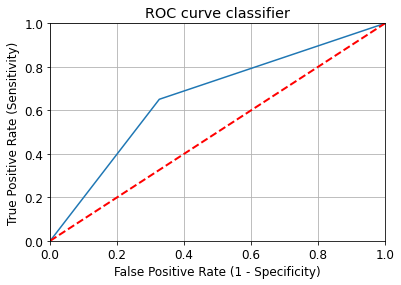

In [196]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [197]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))


0.6624754770822185


In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

           feature       VIF
0            price  3.664132
1         air_qual  2.963475
2         room_num  1.923479
3         teachers  1.324263
4        poor_prop  3.275640
5          airport  1.040543
6       n_hos_beds  1.042189
7     avg_distance  2.786946
8   Lake and River  1.017085
9             None  1.019384
10           River  1.032332


In [199]:
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, x_train)
result = model.fit(method='newton')
 
result.params
  
result.predict(x_test)
  
result.predict(x_test >= 0.5).astype(int)
  
result.pred_table()
  
result.summary()

Optimization terminated successfully.
         Current function value: 0.587790
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  354
Model:                          Logit   Df Residuals:                      343
Method:                           MLE   Df Model:                           10
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.1500
Time:                        09:20:23   Log-Likelihood:                -208.08
converged:                       True   LL-Null:                       -244.81
Covariance Type:            nonrobust   LLR p-value:                 9.470e-12
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
price             -1.9262      0.300     -6.427      0.000      -2.514      -1.339
air_qual          -0.5505      0.212     -2.603      0.009      -0.965      -0.136
room_num           0.5280      0.198      2.670      0.008       0.140       0.916
teachers           0.3204      0.143      2.238      0.025       0.040       0.601
poor_prop         -1.3268      0.255     -5.193      0.000      -1.828      -0.826
airport           -0.1067      0.121     -0.883      0.377      -0.344       0.130
n_hos_beds         0.3200      0.122      2.624      0.009       0.081       0.559
avg_distance      -0.9564      0.223     -4.298      0.000      -1.393      -0.520
Lake and River    -0.2371      0.322     -0.736      0.462      -0.869       0.395
None              -0.3904      0.222     -1.758      0.079      -0.826       0.045
River              0.1091      0.197      0.555      0.579      -0.276       0.494
==================================================================================
"""

In [200]:
x6=House_Price[['price', 'air_qual','room_num','teachers', 'poor_prop', 'airport','n_hos_beds', 'avg_distance', 'None','River']]
y6=House_Price['Sold']

In [201]:
# Train Test Splitting 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x6, y6, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (354, 10)
x_test  (152, 10)
y_train  (354,)
y_test  (152,)


In [202]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)


In [203]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)


In [204]:
pred

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [205]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.6776315789473685
[[61 28]
 [21 42]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71        89
           1       0.60      0.67      0.63        63

    accuracy                           0.68       152
   macro avg       0.67      0.68      0.67       152
weighted avg       0.68      0.68      0.68       152



In [206]:
TPR=TP/(TP+FN)
print(TPR)



0.6507936507936508


In [207]:
FPR=TP/(TP+FP)
print(FPR)




0.5942028985507246


In [208]:
sensitivity = TP / float(FN + TP)
print(sensitivity)



0.6507936507936508


In [209]:
# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))



0.6666666666666666


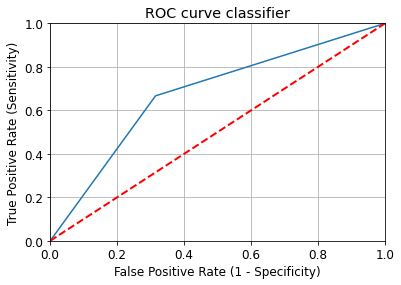

In [210]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [211]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))


0.6760299625468165


In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

        feature       VIF
0         price  3.663205
1      air_qual  2.963375
2      room_num  1.911707
3      teachers  1.320859
4     poor_prop  3.275457
5       airport  1.038423
6    n_hos_beds  1.037434
7  avg_distance  2.786914
8          None  1.019383
9         River  1.032287


In [213]:
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, x_train)
result = model.fit(method='newton')
 
result.params
  
result.predict(x_test)
  
result.predict(x_test >= 0.5).astype(int)
  
result.pred_table()
  
result.summary()

Optimization terminated successfully.
         Current function value: 0.588554
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  354
Model:                          Logit   Df Residuals:                      344
Method:                           MLE   Df Model:                            9
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.1489
Time:                        09:20:29   Log-Likelihood:                -208.35
converged:                       True   LL-Null:                       -244.81
Covariance Type:            nonrobust   LLR p-value:                 4.061e-12
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
price           -1.9068      0.296     -6.432      0.000      -2.488      -1.326
air_qual        -0.5463      0.211     -2.591      0.010      -0.960      -0.133
room_num         0.5102      0.195      2.620      0.009       0.129       0.892
teachers         0.3232      0.143      2.260      0.024       0.043       0.604
poor_prop       -1.3154      0.254     -5.188      0.000      -1.812      -0.818
airport         -0.1022      0.121     -0.847      0.397      -0.339       0.134
n_hos_beds       0.3119      0.121      2.570      0.010       0.074       0.550
avg_distance    -0.9495      0.221     -4.287      0.000      -1.384      -0.515
None            -0.3870      0.222     -1.747      0.081      -0.821       0.047
River            0.1081      0.196      0.551      0.582      -0.276       0.493
================================================================================
"""

In [214]:
x7=House_Price[['price', 'air_qual','room_num','teachers', 'poor_prop', 'airport','n_hos_beds', 'avg_distance', 'None']]
y7=House_Price['Sold']

In [215]:
# Train Test Splitting 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x7, y7, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)


x_train  (354, 9)
x_test  (152, 9)
y_train  (354,)
y_test  (152,)


In [216]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)


In [217]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)


In [218]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.6644736842105263
[[57 32]
 [19 44]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        89
           1       0.58      0.70      0.63        63

    accuracy                           0.66       152
   macro avg       0.66      0.67      0.66       152
weighted avg       0.68      0.66      0.67       152



In [219]:
TPR=TP/(TP+FN)
print(TPR)



0.6507936507936508


In [220]:
FPR=TP/(TP+FP)
print(FPR)



0.5942028985507246


In [221]:
sensitivity = TP / float(FN + TP)
print(sensitivity)




0.6507936507936508


In [222]:
# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))



0.6984126984126984


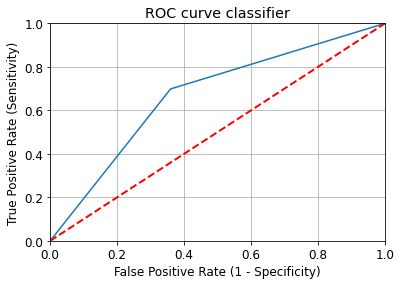

In [223]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [224]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))


0.6694310683074729


In [225]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

        feature       VIF
0         price  3.661759
1      air_qual  2.963191
2      room_num  1.910590
3      teachers  1.320448
4     poor_prop  3.255138
5       airport  1.038354
6    n_hos_beds  1.021491
7  avg_distance  2.780557
8          None  1.019305


In [226]:
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, x_train)
result = model.fit(method='newton')
 
result.params
  
result.predict(x_test)
  
result.predict(x_test >= 0.5).astype(int)
  
result.pred_table()
  
result.summary()

Optimization terminated successfully.
         Current function value: 0.588984
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  354
Model:                          Logit   Df Residuals:                      345
Method:                           MLE   Df Model:                            8
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.1483
Time:                        09:20:34   Log-Likelihood:                -208.50
converged:                       True   LL-Null:                       -244.81
Covariance Type:            nonrobust   LLR p-value:                 1.478e-12
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
price           -1.9125      0.298     -6.422      0.000      -2.496      -1.329
air_qual        -0.5455      0.211     -2.584      0.010      -0.959      -0.132
room_num         0.5133      0.196      2.615      0.009       0.128       0.898
teachers         0.3261      0.143      2.278      0.023       0.046       0.607
poor_prop       -1.3265      0.254     -5.227      0.000      -1.824      -0.829
airport         -0.1005      0.120     -0.835      0.404      -0.337       0.136
n_hos_beds       0.3026      0.120      2.523      0.012       0.068       0.538
avg_distance    -0.9529      0.222     -4.298      0.000      -1.387      -0.518
None            -0.3871      0.222     -1.747      0.081      -0.821       0.047
================================================================================
"""

In [227]:
x8=House_Price[['price','teachers', 'room_num', 'airport', 'poor_prop', 'n_hos_beds', 'avg_distance']]
y8=House_Price['Sold']

In [228]:
# Train Test Splitting 
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x8, y8, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)


x_train  (354, 7)
x_test  (152, 7)
y_train  (354,)
y_test  (152,)


In [229]:
from sklearn.linear_model import LogisticRegression
glm= LogisticRegression()
model=glm.fit(x_train, y_train)



In [230]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred=model.predict(x_test)


In [231]:

print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.6973684210526315
[[63 26]
 [20 43]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        89
           1       0.62      0.68      0.65        63

    accuracy                           0.70       152
   macro avg       0.69      0.70      0.69       152
weighted avg       0.70      0.70      0.70       152



In [232]:
TPR=TP/(TP+FN)
print(TPR)




0.6507936507936508


In [233]:
FPR=TP/(TP+FP)
print(FPR)



0.5942028985507246


In [234]:
sensitivity = TP / float(FN + TP)
print(sensitivity)



0.6507936507936508


In [235]:
# Alternatively, directly call the recall_score function
print(metrics.recall_score(y_test, pred))



0.6825396825396826


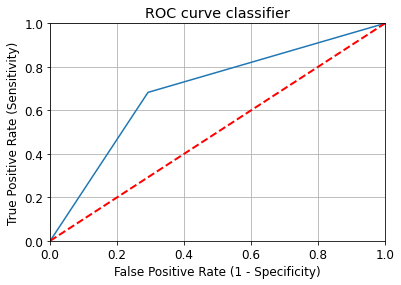

In [236]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [237]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
print(metrics.roc_auc_score(y_test, pred))


0.6952024255395042


In [238]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = x_train.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) 
                          for i in range(len(x_train.columns))] 
  
print(vif_data)

        feature       VIF
0         price  3.498032
1      teachers  1.304165
2      room_num  1.906021
3       airport  1.034927
4     poor_prop  3.224744
5    n_hos_beds  1.014108
6  avg_distance  1.441925


In [239]:
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, x_train)
result = model.fit(method='newton')
 
result.params
  
result.predict(x_test)
  
result.predict(x_test >= 0.5).astype(int)
  
result.pred_table()
  
result.summary()

Optimization terminated successfully.
         Current function value: 0.603819
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  354
Model:                          Logit   Df Residuals:                      347
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.1269
Time:                        09:20:40   Log-Likelihood:                -213.75
converged:                       True   LL-Null:                       -244.81
Covariance Type:            nonrobust   LLR p-value:                 1.672e-11
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
price           -1.6812      0.273     -6.157      0.000      -2.216      -1.146
teachers         0.2949      0.137      2.150      0.032       0.026       0.564
room_num         0.4528      0.188      2.411      0.016       0.085       0.821
airport         -0.0726      0.118     -0.613      0.540      -0.305       0.159
poor_prop       -1.3313      0.246     -5.414      0.000      -1.813      -0.849
n_hos_beds       0.3247      0.118      2.746      0.006       0.093       0.556
avg_distance    -0.5523      0.152     -3.625      0.000      -0.851      -0.254
================================================================================
"""